# Unsupervised Learning/Clustering - ALLLife Bank Project

##### Elige Grant
##### April 2021

## Data Description:

The dataset contains data on 660 ALLLife bank customers. The data include various basic customer information including their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

## Domain:

Banking/Credit

## Background and Context:

AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.


## Objective:

To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank. Answer the following questions:

 1. How many different segments of customers are there?
 2. How are these segments different from each other?
 3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Dictionary:

### Customer Details:

* SI_No: Serial Index number
* Customer_Key: Client number. Unique identifier for the customer holding the account
* Avg_Credit_Limit: Average Credit Limit for Customer
* Total_Credit_Cards: Total Credit Cards for Customer
* Total_visits_bank: Total Visits made to physical bank by Customer
* Total_visits_online: Total Visits made to Online website by Customer
* Total_calls_made: Total calls made to Customer Service made by Customer


## Steps and Tasks:

## Load libraries and data (view/summarize data)

In [1]:
import warnings
warnings.filterwarnings("ignore")

#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

all_col = df.iloc[:,1:].columns.tolist()

In [3]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
# Check data types and number of non-null values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
# Summary numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [7]:
# Check the unique values in each column of the dataframe.
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [8]:
# Check to see if there are duplicate rows
df.duplicated().sum()

0

In [9]:
# Selecting duplicate rows based
# on 'Customer Key' column
first_dup = df[df.duplicated('Customer Key',keep='last')]
last_dup = df[df.duplicated('Customer Key',keep='first')]
all_dup = pd.concat([first_dup,last_dup])

print("Duplicate Rows based on Customer Key :")
  
# Print the resultant Dataframe
all_dup

Duplicate Rows based on Customer Key :


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
391,392,96929,13000,4,5,0,0
411,412,50706,44000,4,5,0,2
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


#### Summary
 - 660 Customers
 - 7 Columns of data, although the first two can likely be removed from analysis
 - Average Credit Card Limit numbers are significantly larger than others. Will need to scale data
 - No null/NaN values for all columns
 - 5 duplicate customer IDs, but no duplicated Rows. Interestingly, the duplicate IDs have wildly different values. Remove?
 
#### Basic Statistics

- SI_No
 - Not important. Sequential index numbers
 - Remove!
- Customer Key
 - Not likely to be important (except later when needing to identify customers). Random numbers that will not help modeling/grouping
 - Remove!
- Avg_Credit_Limit
 - Min is 3000
 - Max is 200000 (suspiciously high)
 - Mean is ~35k dollars
 - Median is 18k dollars
- Total_Credit_Cards
 - Min is 1
 - Max is 10 (suspiciously high)
 - Mean is ~4.7
 - Median is 5
- Total_visits_bank
 - Min is 0
 - Max is 5
 - Mean is ~2.4
 - Median is 2
- Total_visits_online
 - Min is 0
 - Max is 15
 - Mean is ~2.6
 - Median is 2
- Total_calls_made
 - Min is 0
 - Max is 10
 - Mean is ~3.6
 - Median is 3

## EDA (15 Marks)
### 01 - Univariate analysis (5 marks)

In [10]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [11]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

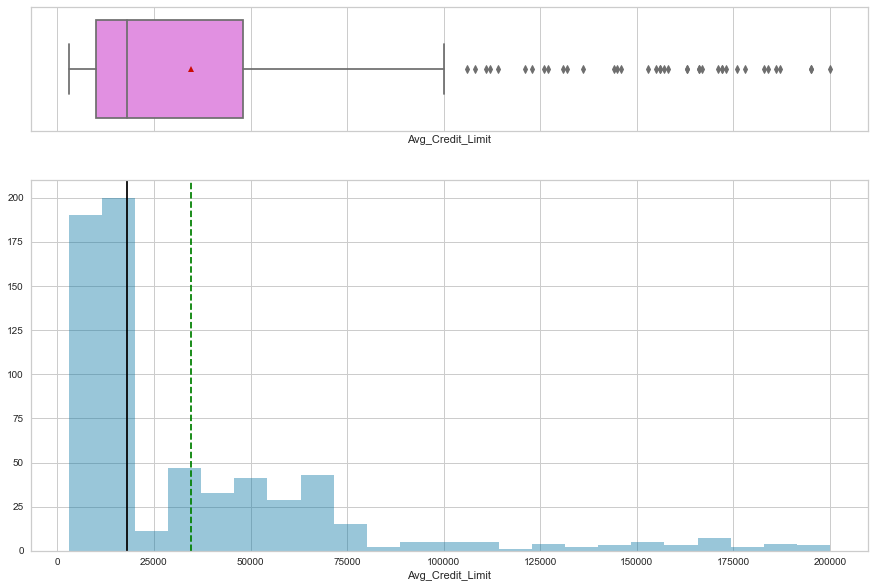

In [12]:
# Avg_Credit_Limit
histogram_boxplot(df['Avg_Credit_Limit'])

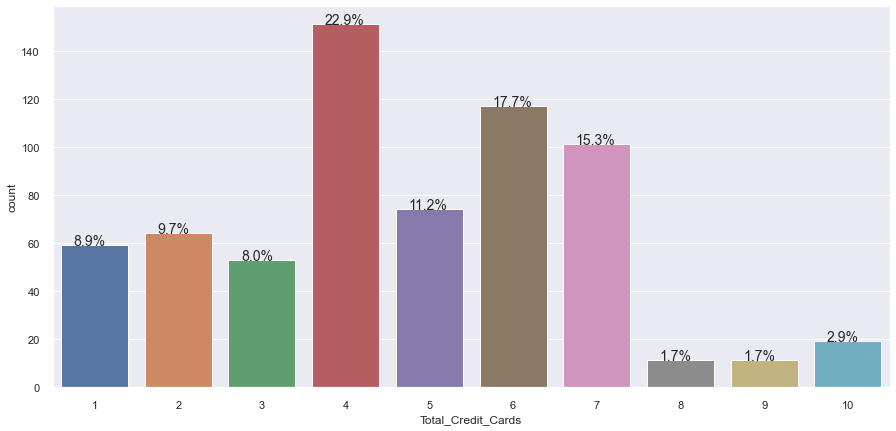

In [13]:
# Total_Credit_Cards
perc_on_bar(df['Total_Credit_Cards'])

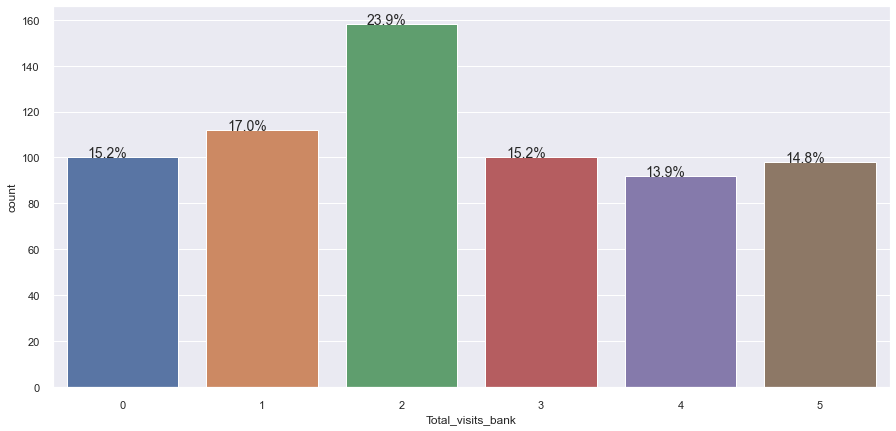

In [14]:
# Total_visits_bank
perc_on_bar(df['Total_visits_bank'])

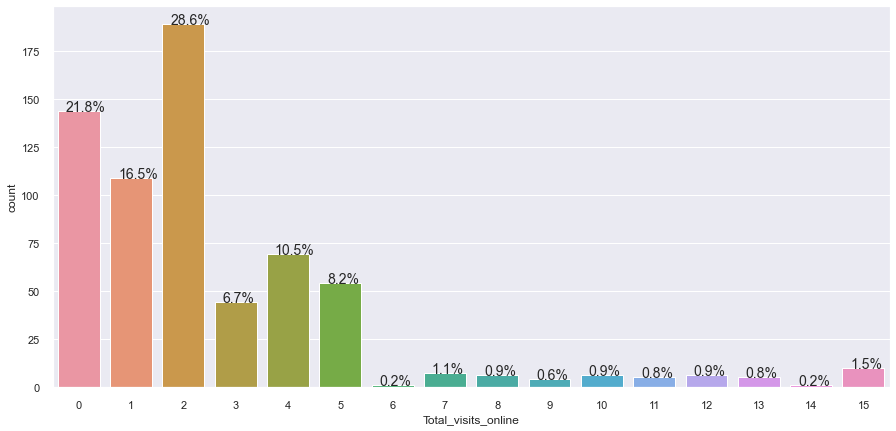

In [15]:
# Total_visits_online
perc_on_bar(df['Total_visits_online'])

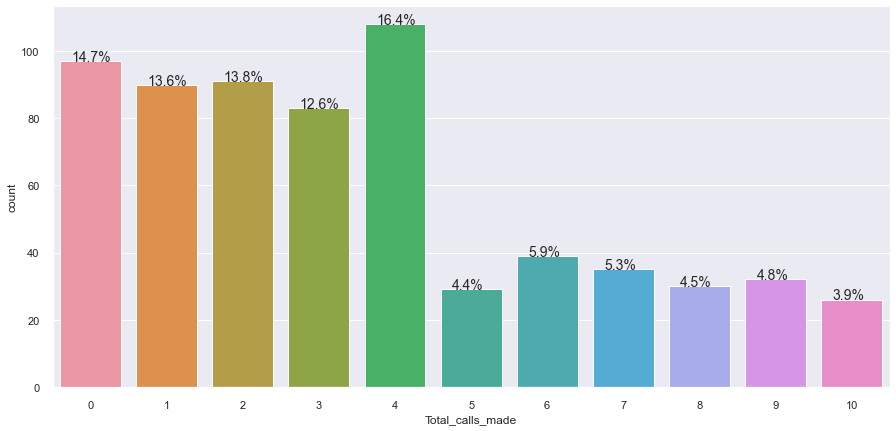

In [16]:
# Total_calls_made
perc_on_bar(df['Total_calls_made'])

#### Observations
1. Avg_Credit_Limit
 - The vast majority of customers have lower than 25k dollar credit limit
 - The second most group has credit between 25k and 75k dollar credit limits
 - The third most group has higher than 75k dollar credit limit
2. Total_Credit_Cards
 - Majority of customers with 4-7 Cards
 - Second most are 1 - 3
 - Third most are 8+
3. Total_visits_bank
 - Similar number of customers visit the bank for all the # of times in the range (0-5) except for 2, which seems to be ~33% more
4. Total_visits_online
 - Vast majority visits the bank online 0 - 2 times
 - Second most visits 3 - 5 
 - Third most is 6+
5. Total_calls_made
 - Even number of customers call the bank between 0 and 4 calls (80 - 110 calls) and 5 and 10 calls (25 - 40 calls)

### 02 - Bivariate analysis ( 4 marks)

#### Pairplot

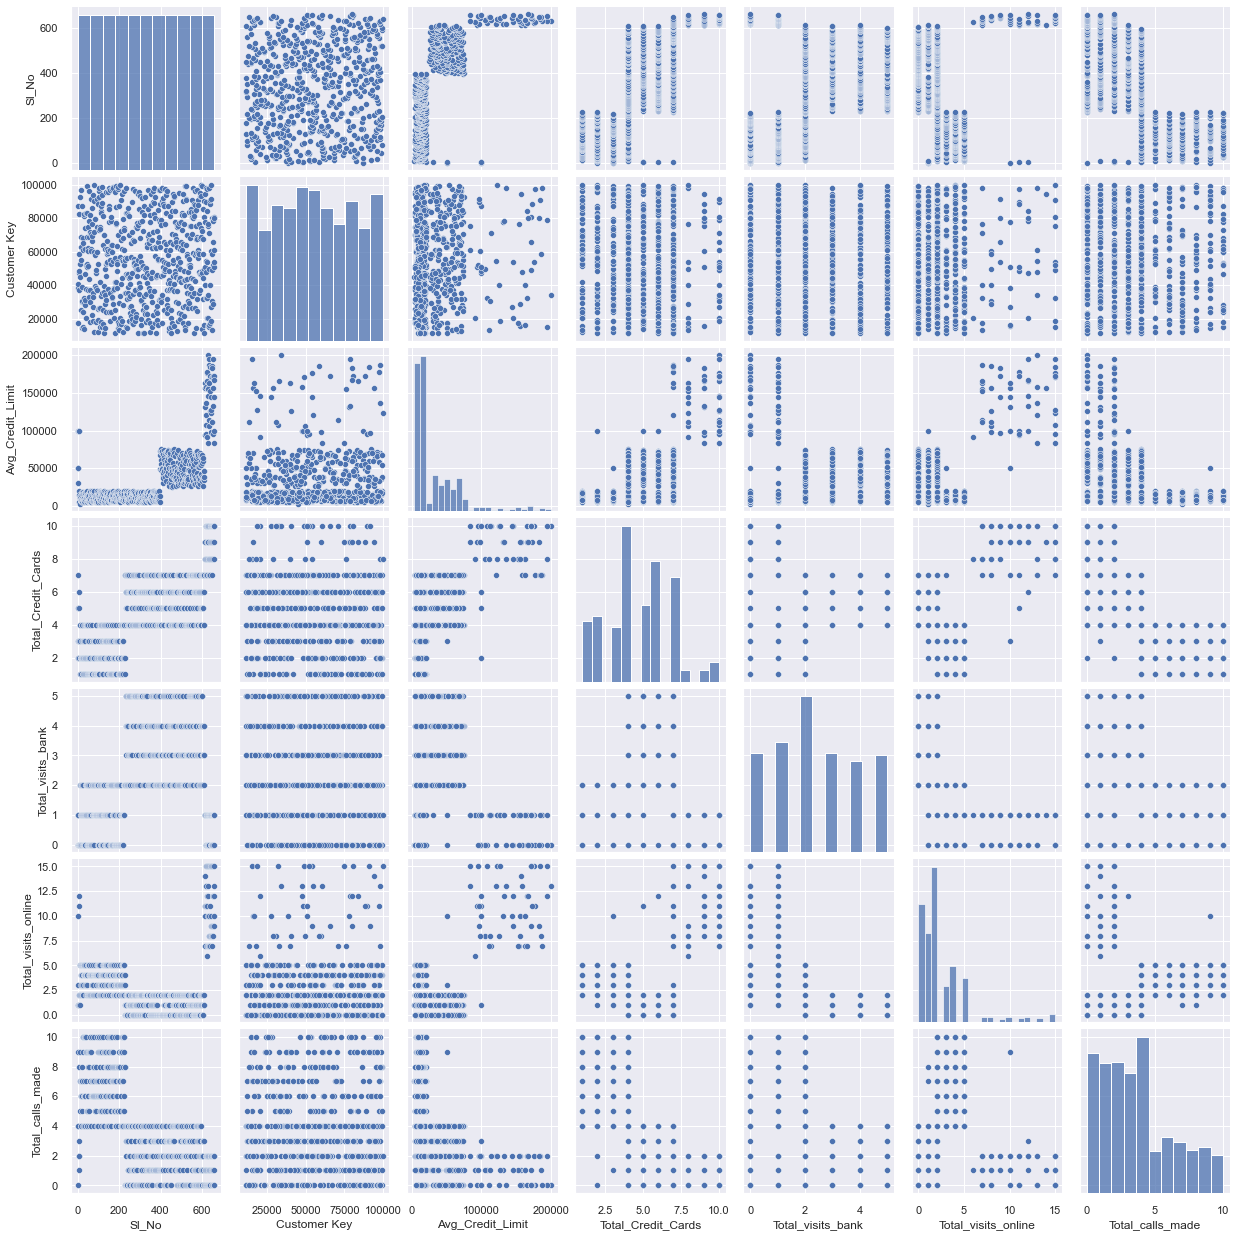

In [17]:
#Pairplot only continuous features to get basic feel
sns.pairplot(data=df)
plt.show()

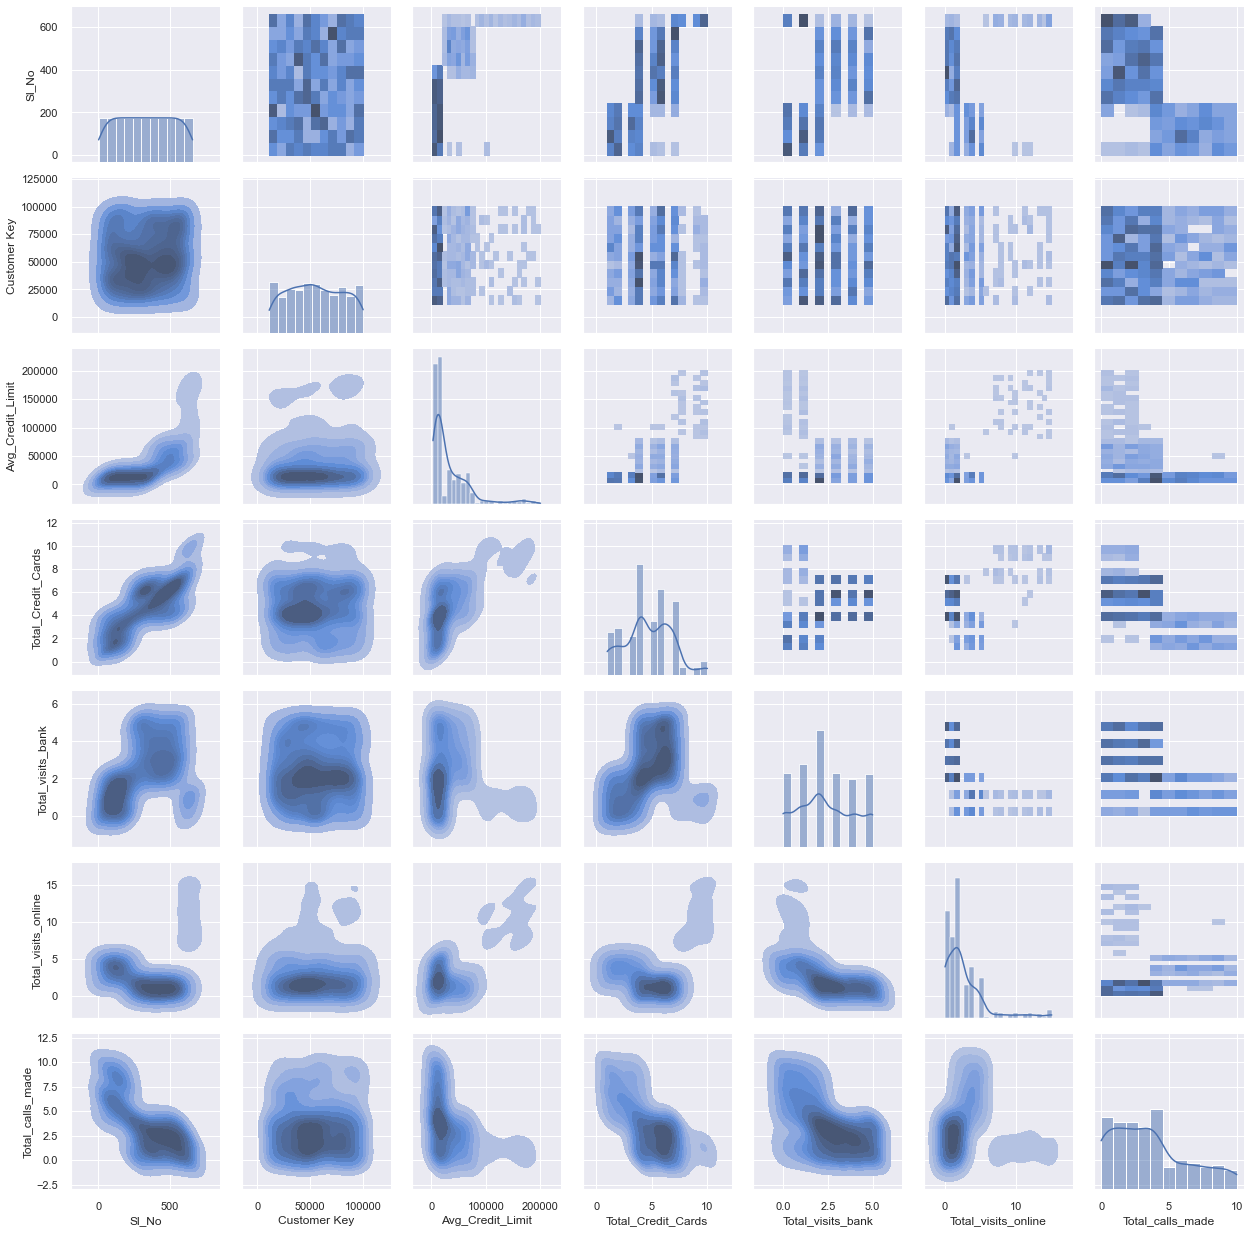

In [18]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

#### Correlation

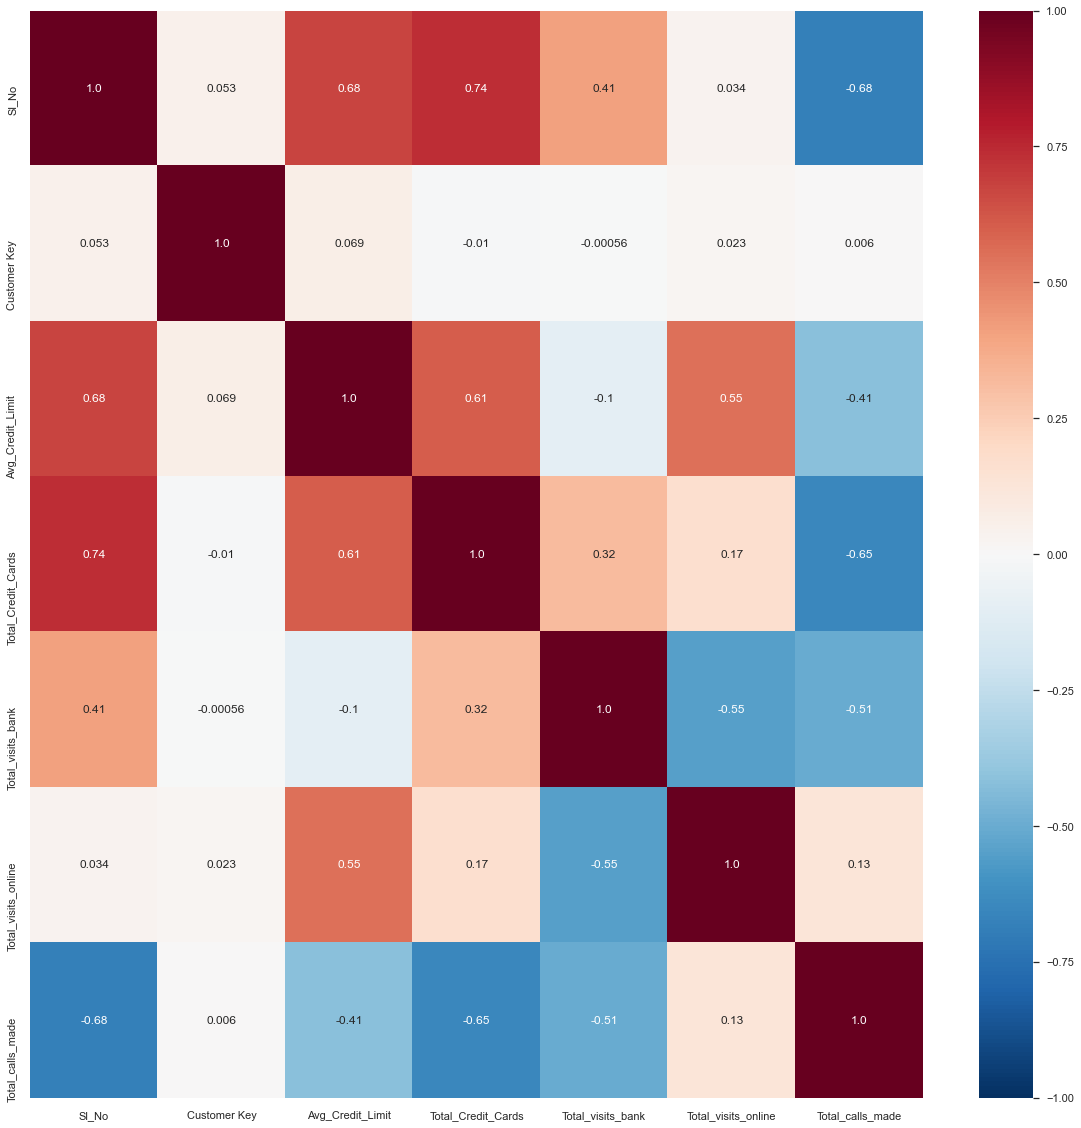

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2", cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

* Strong (Positive and Negative) Correlators [0.75 - 1]
 1. Total_Credit_Cards and SI_No (+0.74)
* Moderate (Positive and Negative) Correlators [0.5 - 0.75]
 1. Avg_Credit_Limit and SI_No (+0.68)
 2. Total_calls_made and SI_No (-0.68)
 3. Total_Credit_Cards and Total_calls_made (-0.65)
 5. Total_Credit_Cards and Avg_Credit_Limit (+0.61)
 6. Total_visits_online and Avg_Credit_Limit (+0.55)
 7. Total_visits_online and Total_visits_bank (-0.55)
 8. Total_calls_made and Total_visits_bank (-0.51)
* Weak (Positve AND Negative) Correlators [0.25 - 0.5]
 1. Total_visits_bank and SI_No (+0.41)
 2. Total_cals_made and Avg_Credit_Limit (-0.41)
 3. Total_visits_bank and Total_Credit_Cards (+0.32)

#### Observations

- Serial Index number seems to allow customers to be grouped into 3 general categories (possibly use to correct suspicious data)
 1. Low Credit Card/Limit
 2. Med. Credit Card/Limit
 3. High Credit Card/Limit
- Customers tend to vist the physical bank more often when those customers have LOWER credit limit
- Customers tend to vist the online site more often when those customers have HIGHER credit limit


### 03 - Use appropriate visualizations to identify the patterns and insights (5 marks)

In [20]:
# Sl_No
# Customer Key
# Customer_Key
# Avg_Credit_Limit
# Total_Credit_Cards
# Total_visits_bank
# Total_visits_online
# Total_calls_made

<AxesSubplot:xlabel='Sl_No', ylabel='Avg_Credit_Limit'>

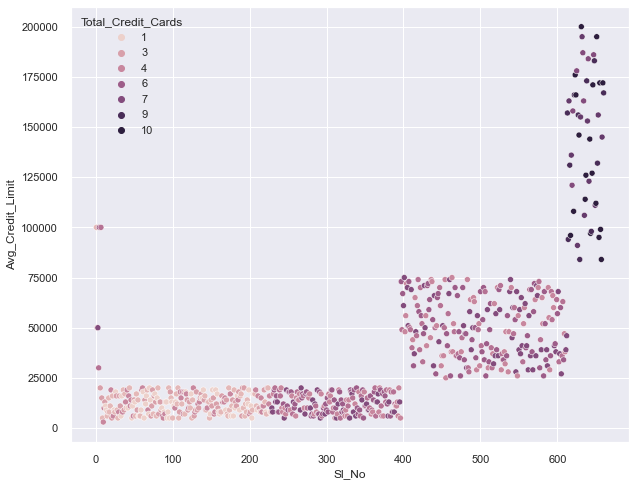

In [21]:
# Sl_No vs. Avg_Credit_Limit (Total_Credit_Cards)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=df, x='Sl_No', y='Avg_Credit_Limit',hue='Total_Credit_Cards')
#ax.set_xlim([0, 40])

(0.0, 10.0)

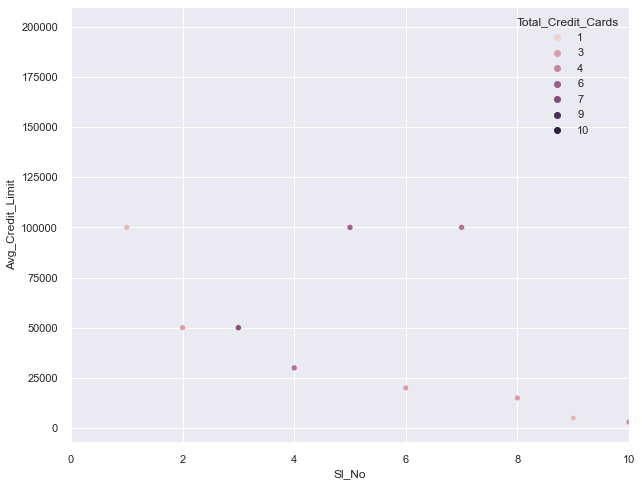

In [22]:
# ZOOM in on Anomolous

# Sl_No vs. Avg_Credit_Limit (Total_Credit_Cards)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=df, x='Sl_No', y='Avg_Credit_Limit',hue='Total_Credit_Cards')
ax.set_xlim([0, 10])

- Suspiciously high credit limits for these 6 individuals given the behavior of the other customers in this SI_No range

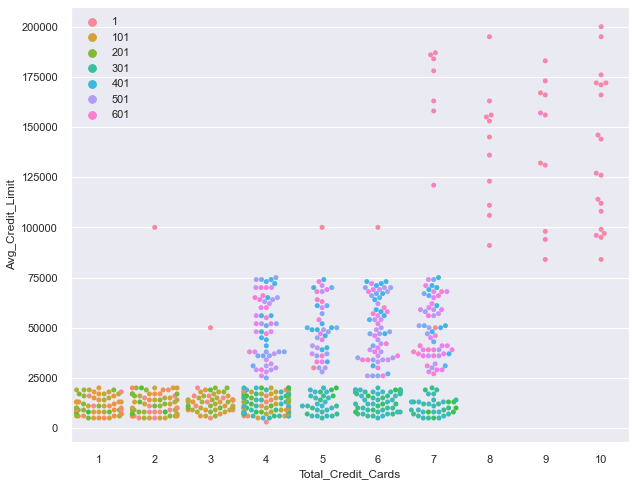

In [23]:
# Total_Credit_Cards vs. Avg_Credit_Limit (Sl_No)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit',hue='Sl_No')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::100], labels[::100])
#ax.set_xlim([0, 40])

- 4 potential groups emerge from this plot
 1. Customers with 1-4 credit cards & Credit limit below 25k dollars
 2. Customers with 4-7 credit cards & Credit limit below 25k dollars
 3. Customers with 4-7 credit cards & Credit limit between 25k and 75k dollars
 4. Customers with 7-10 credit cards & Credit limit above 75k dollars


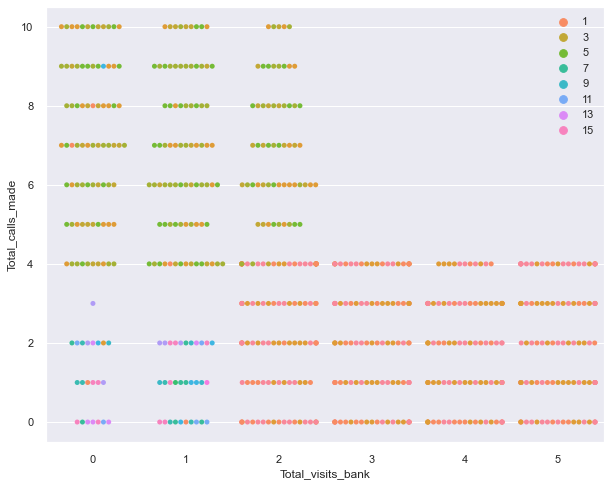

In [24]:
# Total_visits_bank vs. Total_calls_made (Total_visits_online)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_visits_bank', y='Total_calls_made',hue='Total_visits_online')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1::2], labels[1::2])
#ax.set_xlim([0, 40])

- 3 potential groups emerge from this plot
 1. Mostly Online Customers - Customers with 0-1 visits to the bank & 3 or fewer calls
 2. Call/Online Customers - Customers with 0-2 visits to the bank & 4 or more calls
 3. Mostly In-person Banking Customers - Customers with 2 or more visits to the bank & 4 or fewer calls

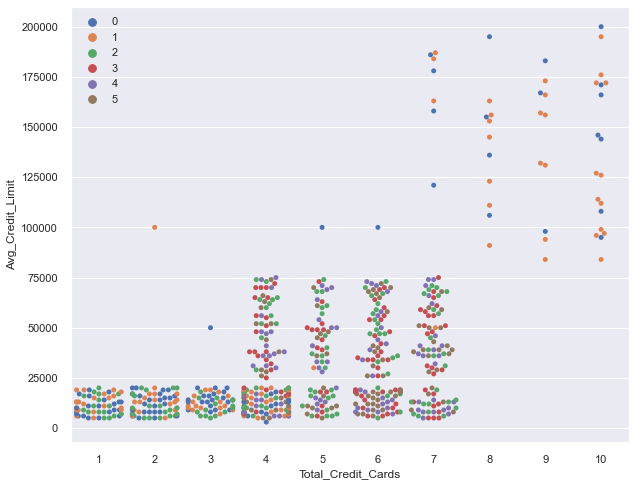

In [25]:
# Total_Credit_Cards vs. Avg_Credit_Limit (Total_visits_bank)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit',hue='Total_visits_bank')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::], labels[::])

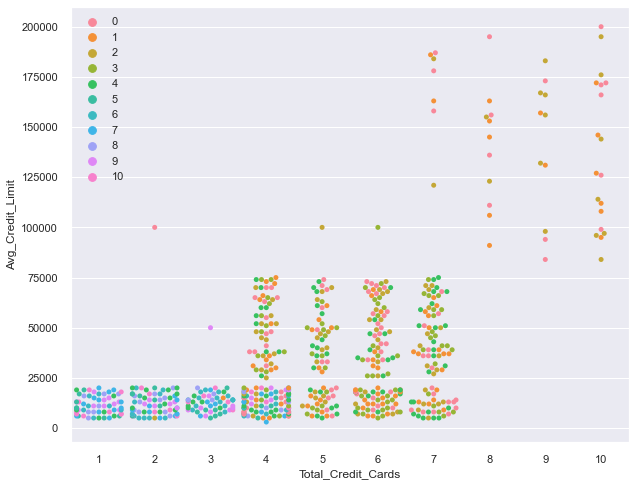

In [26]:
# Total_Credit_Cards vs. Avg_Credit_Limit (Total_calls_made)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit',hue='Total_calls_made')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::], labels[::])

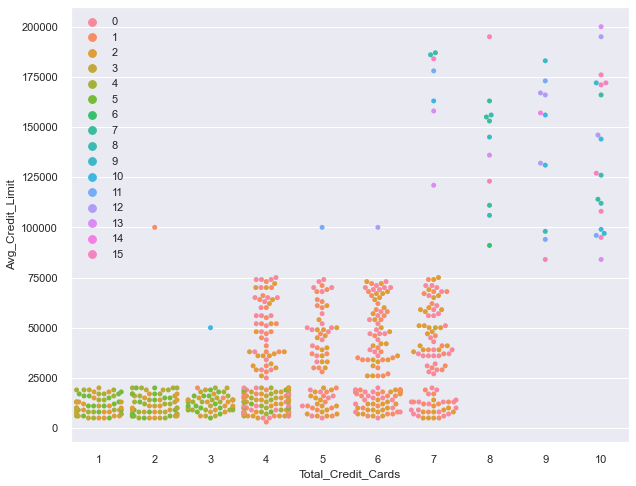

In [27]:
# Total_Credit_Cards vs. Avg_Credit_Limit (Total_visits_online)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit',hue='Total_visits_online')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::], labels[::])

- These plots hint and 3 minimum groups (4 max) and are based on similar obeservations from the previous sets of tri-variate plots

### 04 - Any other exploratory deep dive (1 marks)

In [28]:
# Sl_No
# Customer Key
# Avg_Credit_Limit
# Total_Credit_Cards
# Total_visits_bank
# Total_visits_online
# Total_calls_made

custDataAttr = df[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']]

#### Statistics based on groupby's

In [29]:
custDataClust = custDataAttr.groupby(['Total_Credit_Cards'])
custDataClust.median()

,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,,
1,11000.0,1.0,4.0,7.0
2,11500.0,1.0,4.0,6.5
3,13000.0,1.0,4.0,6.0
4,17000.0,3.0,2.0,3.0
5,33000.0,3.0,1.0,2.0
6,26000.0,3.0,1.0,2.0
7,38000.0,3.0,1.0,2.0
8,145000.0,1.0,8.0,1.0
9,156000.0,1.0,11.0,2.0


In [30]:
custDataClust = custDataAttr.groupby(['Total_visits_bank'])
custDataClust.median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,Total_calls_made
Total_visits_bank,,,,
0,14000.0,3.0,4.0,6.0
1,16000.0,3.0,4.0,5.5
2,16500.0,4.0,2.0,4.0
3,34000.0,6.0,1.0,2.0
4,31500.0,6.0,1.0,2.0
5,20000.0,6.0,1.0,2.0


In [31]:
custDataClust = custDataAttr.groupby(['Total_visits_online'])
custDataClust.median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_calls_made
Total_visits_online,,,,
0,35000.0,6.0,3.5,2.0
1,30000.0,6.0,3.0,2.0
2,15000.0,5.0,3.0,3.0
3,12000.0,2.0,1.0,7.0
4,13000.0,2.0,1.0,7.0
5,11500.0,2.0,1.0,7.0
6,91000.0,8.0,1.0,1.0
7,155000.0,8.0,1.0,1.0
8,119000.0,8.5,0.5,1.0


In [32]:
custDataClust = custDataAttr.groupby(['Total_calls_made'])
custDataClust.median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online
Total_calls_made,,,,
0,41000.0,6.0,3.0,1.0
1,30000.0,6.0,3.0,2.0
2,45000.0,6.0,3.0,1.0
3,36000.0,6.0,4.0,1.0
4,18000.0,5.0,2.5,1.0
5,11000.0,2.0,1.0,4.0
6,11000.0,3.0,1.0,4.0
7,12000.0,2.0,1.0,3.0
8,13000.0,2.0,1.0,4.0


- These data frames produce similar obeservations from the previous sets of tri-variate plots

### Data Clean-up and Scaling

In [33]:
df[((df['Avg_Credit_Limit'] > 25000) & (df['Sl_No'] < 50))] 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
6,7,48370,100000,5,0,11,2


In [34]:
df[((df['Avg_Credit_Limit'] > 75000) & (df['Total_Credit_Cards'] < 7))] 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
4,5,47437,100000,6,0,12,3
6,7,48370,100000,5,0,11,2


In [35]:
df[((df['Avg_Credit_Limit'] > 25000) & (df['Total_Credit_Cards'] < 4))] 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9


In [36]:
# Print the resultant Dataframe
all_dup

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
391,392,96929,13000,4,5,0,0
411,412,50706,44000,4,5,0,2
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


#### Solution to apparent outliers 
- Remove these data points (only 15 total points) since we cannot clarify what potential mistakes were made when adding these clients to the database

In [37]:
df.drop([0, 1, 2, 3, 4, 6, 48, 104, 391, 411, 332, 398, 432, 541, 632], inplace=True )

 - Drop the SI_No and Customer Key columns

In [38]:
df.drop(columns=['Sl_No', 'Customer Key'], inplace=True )

 - Reset Indices

In [39]:
df.reset_index(drop=True)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,20000,3,0,1,8
1,15000,3,0,1,1
2,5000,2,0,2,2
3,3000,4,0,1,7
4,10000,4,0,5,5
...,...,...,...,...,...
640,99000,10,1,10,0
641,84000,10,1,13,2
642,145000,8,1,9,1
643,172000,10,1,15,0


 - Scale data based on ZSCORE

In [40]:
df_Scaled=df.apply(zscore)
df_Scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
5,-0.376039,-0.781202,-1.488463,-0.545483,1.544113
7,-0.510502,-0.781202,-1.488463,-0.545483,-0.908110
8,-0.779428,-1.240942,-1.488463,-0.200545,-0.557793
9,-0.833214,-0.321462,-1.488463,-0.545483,1.193796
10,-0.644965,-0.321462,-1.488463,0.834269,0.493160
...,...,...,...,...,...
655,1.748481,2.436980,-0.872646,2.558959,-1.258428
656,1.345092,2.436980,-0.872646,3.593773,-0.557793
657,2.985544,1.517499,-0.872646,2.214021,-0.908110
658,3.711646,2.436980,-0.872646,4.283649,-1.258428


## K-means (15 marks)
### 05 - Apply K-means (5 marks)

In [41]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_Scaled)
    prediction=model.predict(df_Scaled)
    distortion=sum(np.min(cdist(df_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_Scaled.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

Number of Clusters: 1 	Average Distortion: 2.002932372850382
Number of Clusters: 2 	Average Distortion: 1.4466889120124184
Number of Clusters: 3 	Average Distortion: 1.1385924189204355
Number of Clusters: 4 	Average Distortion: 1.0402107571201356
Number of Clusters: 5 	Average Distortion: 0.9842047163640505
Number of Clusters: 6 	Average Distortion: 0.9355686341605527
Number of Clusters: 7 	Average Distortion: 0.9038371269263283
Number of Clusters: 8 	Average Distortion: 0.8811743735119163


### 06 - Elbow curve (3 marks)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

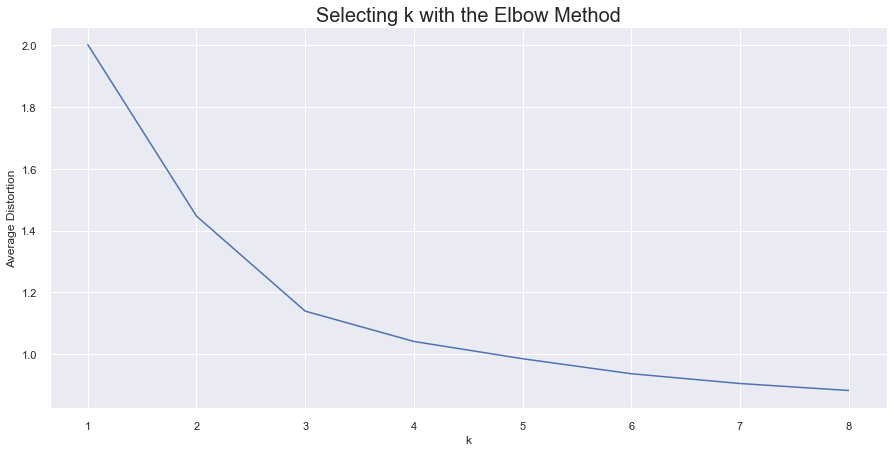

In [42]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

- Appropriate value of k seems to be either 3 or 4 (as predicted in earlier EDA)

### 07 - Silhouette Score ( 2 marks) 

In [43]:
# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
# and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a 
# sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest 
# cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if 
# number of labels is 2 <= n_labels <= n_samples - 1.
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_Scaled))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(df_Scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42286437971298296)
For n_clusters = 3, silhouette score is 0.5190760062763643)
For n_clusters = 4, silhouette score is 0.35610496330041513)
For n_clusters = 5, silhouette score is 0.271679979317869)
For n_clusters = 6, silhouette score is 0.256733642360984)
For n_clusters = 7, silhouette score is 0.23808979397424232)
For n_clusters = 8, silhouette score is 0.23075140801584618)
For n_clusters = 9, silhouette score is 0.21376268537366755)


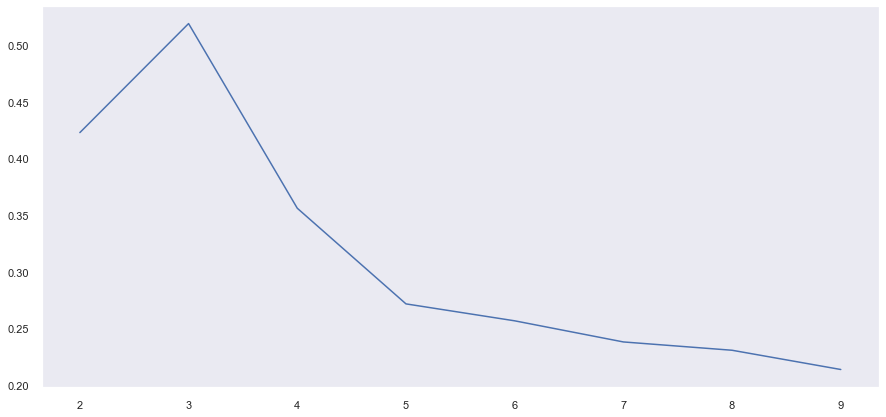

In [44]:
plt.plot(cluster_list,sil_score)
plt.grid()

- From the silhouette score, it seems 3 is the best number of groups

### 08 - Figure out appropriate number of cluster (5 marks)

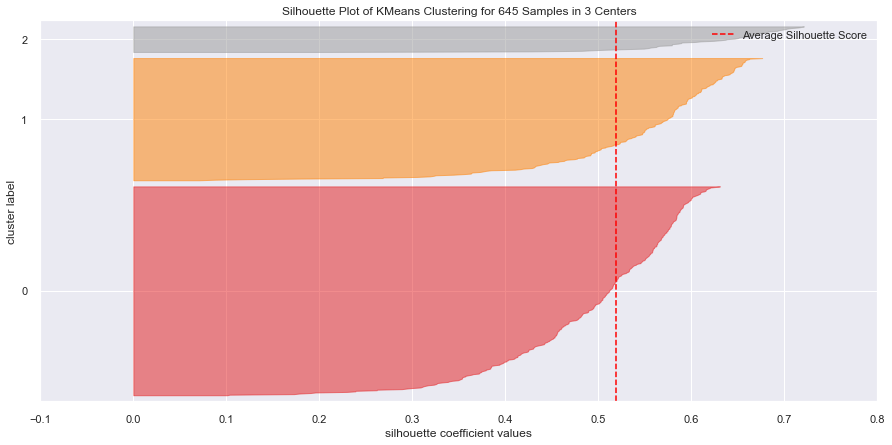

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 645 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
#Finding optimal no. of clusters with silhouette coefficients
Kmeans_3clus = KMeans(3, random_state = 1)
visualizer = SilhouetteVisualizer(Kmeans_3clus)
visualizer.fit(df_Scaled)    
visualizer.show()

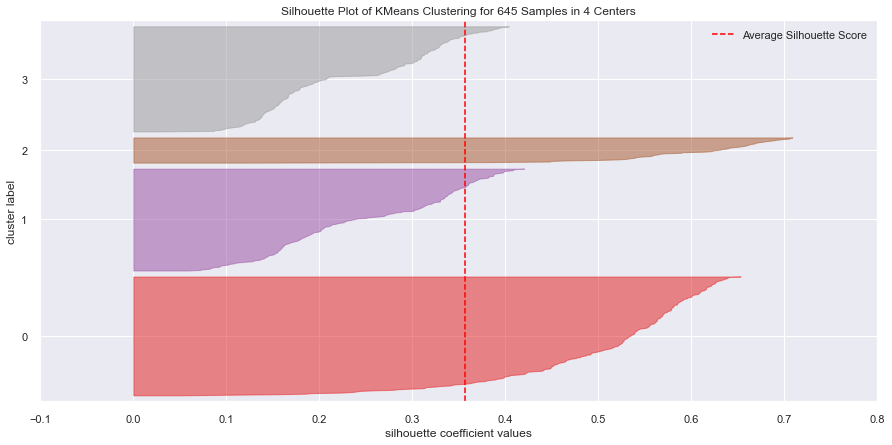

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 645 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
#Finding optimal no. of clusters with silhouette coefficients
Kmeans_4clus = KMeans(4, random_state = 1)
visualizer = SilhouetteVisualizer(Kmeans_4clus)
visualizer.fit(df_Scaled)    
visualizer.show()

#### Observations
 - It appears as if 2 of the groups remain the same regardless of whether there are 3 or 4 groups
 - The largest from the group of 3 appears to be split into two even parts (presumably the group with number of credit cards between 4 and 7 divided up between lower credit and medium credit amounts)
 - Lets go with 3 as both the Distortion Elbow and Silhouette coeefficients appear to say this is the "best"

 ## Hierarchical Clustering (15 marks)
### 09 - Apply Hierarchical clustering with different linkage methods (5 marks?)

#### SciPy Linkage

##### Different Methods

In [47]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Avg = linkage(df_Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z_Euc_Avg , pdist(df_Scaled))

c

0.899987632864173

In [48]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Wgt = linkage(df_Scaled, metric='euclidean', method='weighted')
c, coph_dists = cophenet(Z_Euc_Wgt , pdist(df_Scaled))

c

0.8972479028993607

In [49]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Cent = linkage(df_Scaled, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z_Euc_Cent , pdist(df_Scaled))

c

0.8966053263535703

In [50]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Med = linkage(df_Scaled, metric='euclidean', method='median')
c, coph_dists = cophenet(Z_Euc_Med , pdist(df_Scaled))

c

0.8927860800729189

In [51]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Comp = linkage(df_Scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z_Euc_Comp , pdist(df_Scaled))

c

0.8849345025614995

In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Sing = linkage(df_Scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z_Euc_Sing , pdist(df_Scaled))

c

0.746777924673486

In [53]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Ward = linkage(df_Scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z_Euc_Ward , pdist(df_Scaled))

c

0.7397803077606397

##### Different Distance Metric

In [54]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Euc_Avg = linkage(df_Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z_Euc_Avg , pdist(df_Scaled))

c

0.899987632864173

In [55]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Mink_Avg = linkage(df_Scaled, metric='minkowski', method='average')
c, coph_dists = cophenet(Z_Mink_Avg , pdist(df_Scaled))

c

0.899987632864173

In [56]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_SEuc_Avg = linkage(df_Scaled, metric='seuclidean', method='average')
c, coph_dists = cophenet(Z_SEuc_Avg , pdist(df_Scaled))

c

0.8999876328641729

In [57]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_CBlk_Avg = linkage(df_Scaled, metric='cityblock', method='average')
c, coph_dists = cophenet(Z_CBlk_Avg , pdist(df_Scaled))

c

0.8998472302372147

In [58]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Cheb_Avg = linkage(df_Scaled, metric='chebyshev', method='average')
c, coph_dists = cophenet(Z_Cheb_Avg , pdist(df_Scaled))

c

0.8996362444684207

In [59]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Cos_Avg = linkage(df_Scaled, metric='cosine', method='average')
c, coph_dists = cophenet(Z_Cos_Avg , pdist(df_Scaled))

c

0.669203156185751

In [60]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Corr_Avg = linkage(df_Scaled, metric='correlation', method='average')
c, coph_dists = cophenet(Z_Corr_Avg , pdist(df_Scaled))

c

0.6029621126808055

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Hamm_Avg = linkage(df_Scaled, metric='hamming', method='average')
c, coph_dists = cophenet(Z_Hamm_Avg , pdist(df_Scaled))

c

0.5163911336376799

In [62]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_Jacc_Avg = linkage(df_Scaled, metric='jaccard', method='average')
c, coph_dists = cophenet(Z_Jacc_Avg , pdist(df_Scaled))

c

0.5163911336376799

#### Observations
- Method = Average and Metric = Euclidean/Minkowski give the best Cophenet Index

### 10- Plot dendrograms (5 marks?)

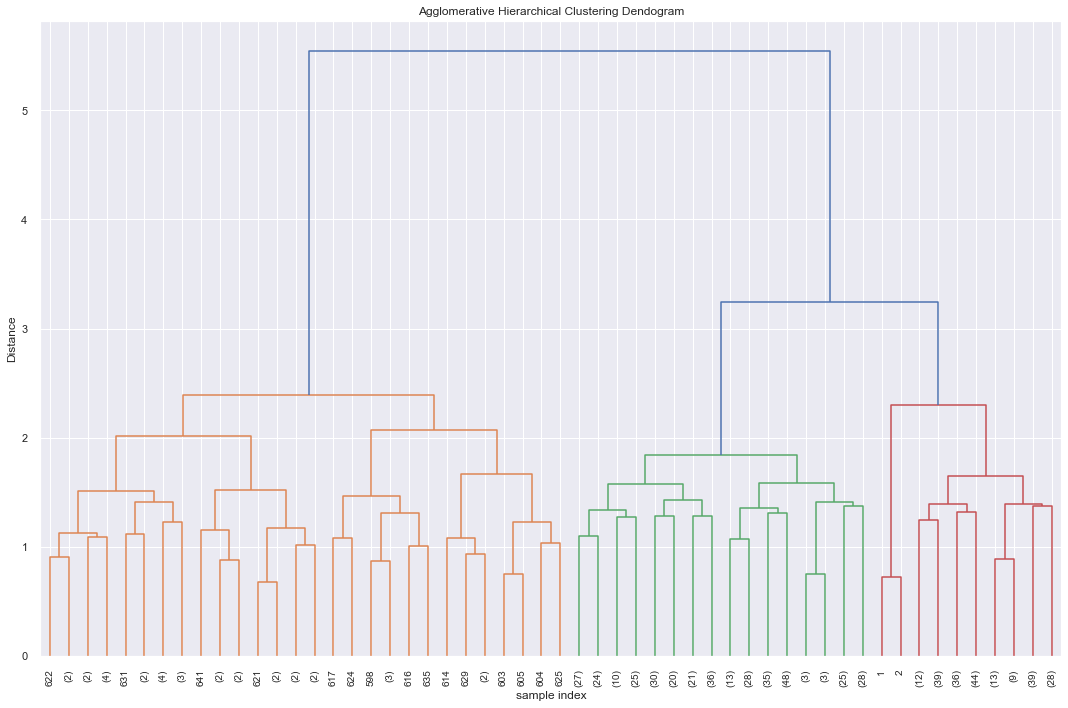

In [63]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_Euc_Avg,leaf_rotation=90.0,p=5,color_threshold=3,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

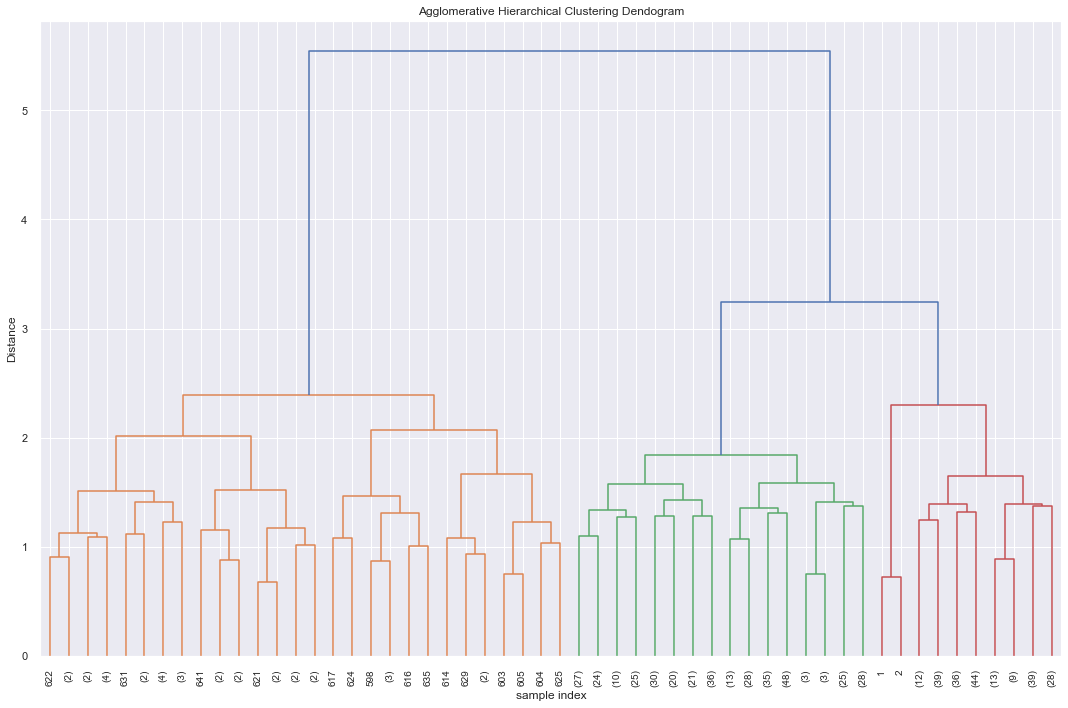

In [64]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_Mink_Avg,leaf_rotation=90.0,p=5,color_threshold=3,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

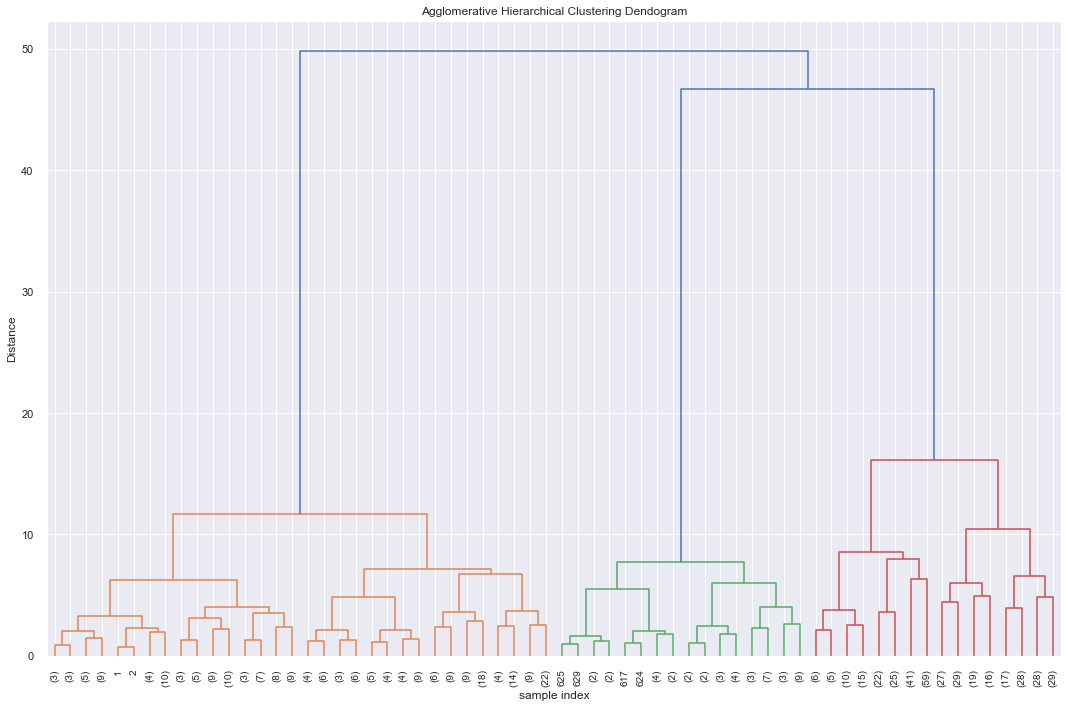

In [65]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_Euc_Ward,leaf_rotation=90.0,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 11 - Choose appropriate number of cluster (5 marks?)

##### Hiearchical with Euclidean as the metric and Average as the Distance Method

In [66]:
# Hiearchical with Euclidean as the metric and Average as the Distance Method
# 2 Groups
max_d = 5
silhouette_score(df_Scaled,fcluster(Z_Euc_Avg, max_d, criterion='distance'))

0.5783826627657942

In [67]:
# Hiearchical with Euclidean as the metric and Average as the Distance Method
# 3 Groups
max_d = 3
silhouette_score(df_Scaled,fcluster(Z_Euc_Avg, max_d, criterion='distance'))

0.5181314882006646

In [68]:
# Hiearchical with Euclidean as the metric and Average as the Distance Method
# 4 Groups
max_d = 2.38
silhouette_score(df_Scaled,fcluster(Z_Euc_Avg, max_d, criterion='distance'))

0.49331243137812547

In [69]:
# Hiearchical with Euclidean as the metric and Average as the Distance Method
# 5 Groups
max_d = 2.29
silhouette_score(df_Scaled,fcluster(Z_Euc_Avg, max_d, criterion='distance'))

0.374086269909869

##### Hiearchical with Euclidean as the metric and Ward as the Distance Method

In [70]:
# Hiearchical with Euclidean as the metric and Ward as the Distance Method
# 3 Groups
max_d = 20
silhouette_score(df_Scaled,fcluster(Z_Euc_Ward, max_d, criterion='distance'))

0.5181314882006646

In [71]:
# Hiearchical with Euclidean as the metric and Ward as the Distance Method
# 4 Groups
max_d = 16
silhouette_score(df_Scaled,fcluster(Z_Euc_Ward, max_d, criterion='distance'))

0.3435437265572813

- Ignoring 2 group silhouette score because this dataset clearly needs more than 2 groups to properly cluster data
- 3 groups appears to produce the best silhouette score for the best Hiearchial Clustering metric/method (i.e., Euclidean/Average)

## Clusters Comparison (8 marks)
### 12 - Compare cluster K-means clusters and Hierarchical clusters (2 marks)

#### Kmeans

In [72]:
# Kmeans with 3 Clusters
silhouette_score(df_Scaled,Kmeans_3clus.fit_predict((df_Scaled)))

0.5190760062763643

In [73]:
# Kmeans with 4 Clusters
silhouette_score(df_Scaled,Kmeans_4clus.fit_predict((df_Scaled)))

0.35610496330041513

#### Hiearchical

In [74]:
# Hiearchical with Euclidean as the metric and Average as the Distance Method
max_d = 3
silhouette_score(df_Scaled,fcluster(Z_Euc_Avg, max_d, criterion='distance'))

0.5181314882006646

In [75]:
# Hiearchical with Minkowski as the metric and Average as the Distance Method
max_d = 3
silhouette_score(df_Scaled,fcluster(Z_Mink_Avg, max_d, criterion='distance'))

0.5181314882006646

In [76]:
# Hiearchical with Euclidean as the metric and Ward as the Distance Method
max_d = 20
silhouette_score(df_Scaled,fcluster(Z_Euc_Ward, max_d, criterion='distance'))

0.5181314882006646

#### Summary

- Kmeans appears to produce a slightly better clustering result based on the Silhouette Score (0.519 vs 0.518 for the best Hiearchical)

### 13 - Perform cluster profiling (2 marks)

#### Kmeans

In [77]:
Kmeans_3clus.fit_predict((df_Scaled))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
df['K_means_labels'] = Kmeans_3clus.labels_

#### Hiearchical

In [79]:
Hiearchical_3clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Hiearchical_3clus.fit(df_Scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [80]:
df['Hiearchical_labels'] = Hiearchical_3clus.labels_

#### Profile

In [81]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_labels,Hiearchical_labels
5,20000,3,0,1,8,1,1
7,15000,3,0,1,1,1,1
8,5000,2,0,2,2,1,1
9,3000,4,0,1,7,1,1
10,10000,4,0,5,5,1,1
...,...,...,...,...,...,...,...
655,99000,10,1,10,0,2,0
656,84000,10,1,13,2,2,0
657,145000,8,1,9,1,2,0
658,172000,10,1,15,0,2,0


##### Kmeans

In [82]:
# Kmeans
Kmeans_cluster_profile = df.groupby('K_means_labels').mean()
Kmeans_cluster_profile['count_in_each_K_means_segment'] = df.groupby('K_means_labels')['Avg_Credit_Limit'].count().values
Kmeans_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Hiearchical_labels,count_in_each_K_means_segment
K_means_labels,,,,,,,
0,33421.750663,5.519894,3.506631,0.976127,2.005305,1.997347,377
1,12009.049774,2.402715,0.941176,3.538462,6.841629,1.000000,221
2,141808.510638,8.914894,0.617021,10.957447,1.042553,0.000000,47


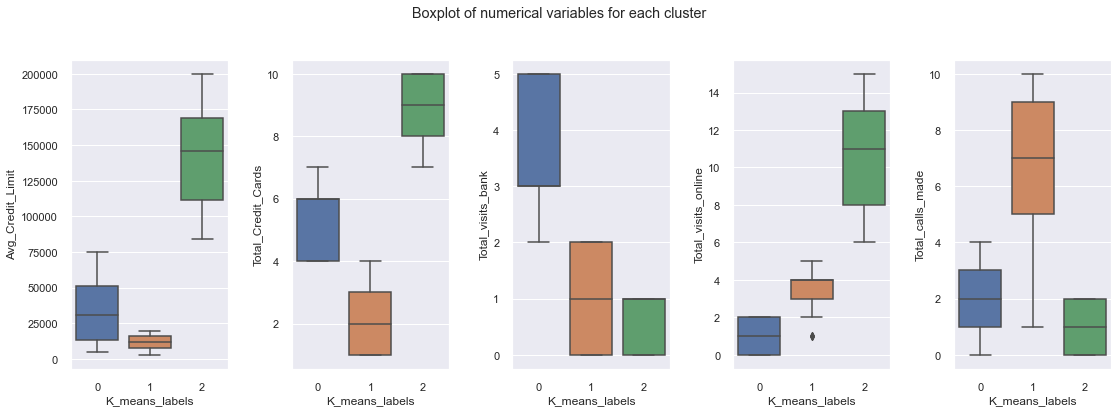

In [83]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 1
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_labels'])
    counter = counter+1

fig.tight_layout(pad=2.0)

##### Hiearchical

In [84]:
# Kmeans
Hiearchical_cluster_profile = df.groupby('Hiearchical_labels').mean()
Hiearchical_cluster_profile['count_in_each_Hiearchical_segment'] = df.groupby('Hiearchical_labels')['Avg_Credit_Limit'].count().values
Hiearchical_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_labels,count_in_each_Hiearchical_segment
Hiearchical_labels,,,,,,,
0,141808.510638,8.914894,0.617021,10.957447,1.042553,2.000000,47
1,11986.486486,2.414414,0.945946,3.531532,6.828829,0.995495,222
2,33492.021277,5.521277,3.510638,0.973404,2.000000,0.000000,376


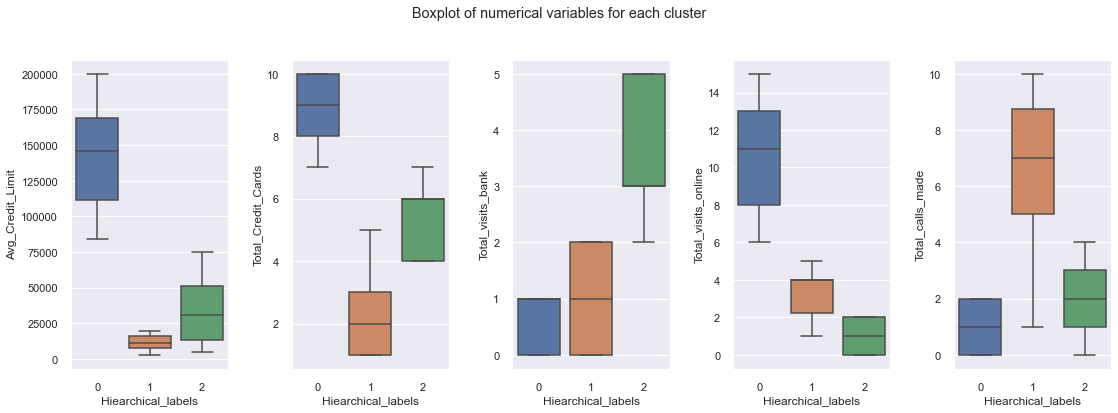

In [85]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 1
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['Hiearchical_labels'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Summary

- Kmeans and Hiearchical are clustering the data in virtually the same manner as evidient by similar Silhoette Scores and Profile statistics

### 14 -  Derive Insights (4 marks)

##### K Means

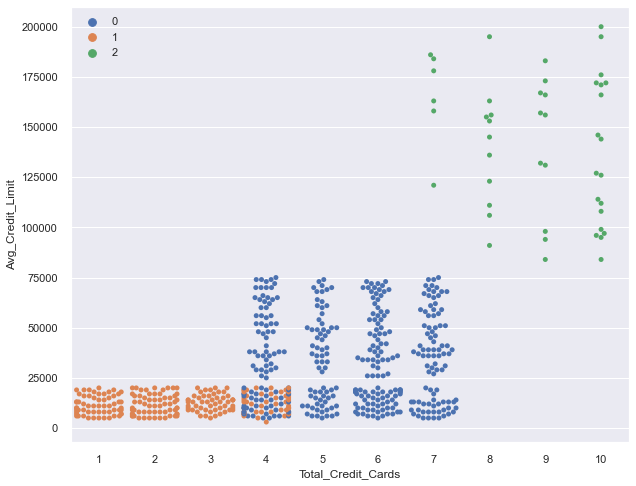

In [86]:
# Total_Credit_Cards vs. Avg_Credit_Limit (K_means_labels)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit',hue='K_means_labels')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::], labels[::])

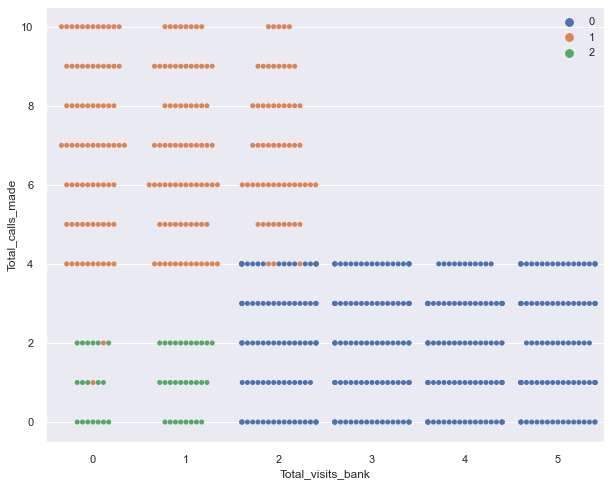

In [87]:
# Total_visits_bank vs. Total_calls_made (K_means_labels)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_visits_bank', y='Total_calls_made',hue='K_means_labels')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:])
#ax.set_xlim([0, 40])

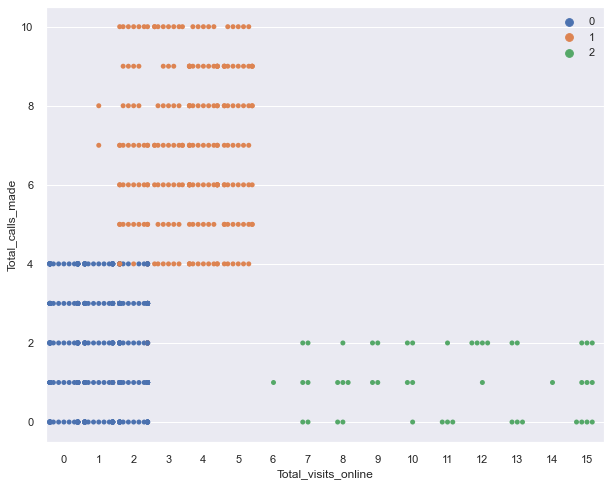

In [101]:
# Total_visits_online vs. Total_calls_made (K_means_labels)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_visits_online', y='Total_calls_made',hue='K_means_labels')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:])
#ax.set_xlim([0, 40])

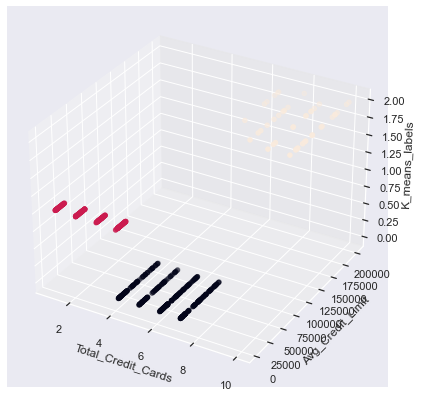

In [103]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Total_Credit_Cards']
y = df['Avg_Credit_Limit']
z = df['K_means_labels']
h = df['K_means_labels']

ax.set_xlabel("Total_Credit_Cards")
ax.set_ylabel("Avg_Credit_Limit")
ax.set_zlabel("K_means_labels")

ax.scatter(x, y, z, c=h)

plt.show()

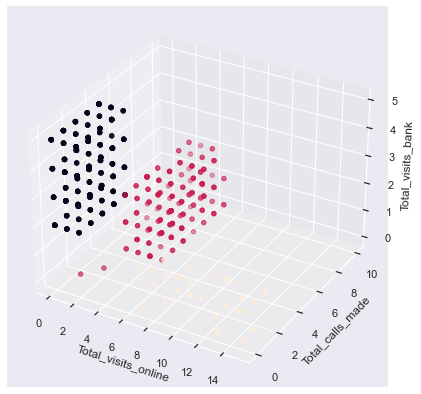

In [100]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Total_visits_online']
y = df['Total_calls_made']
z = df['Total_visits_bank']
h = df['K_means_labels']

ax.set_xlabel("Total_visits_online")
ax.set_ylabel("Total_calls_made")
ax.set_zlabel("Total_visits_bank")

ax.scatter(x, y, z, c=h)

plt.show()

##### Hiearchical

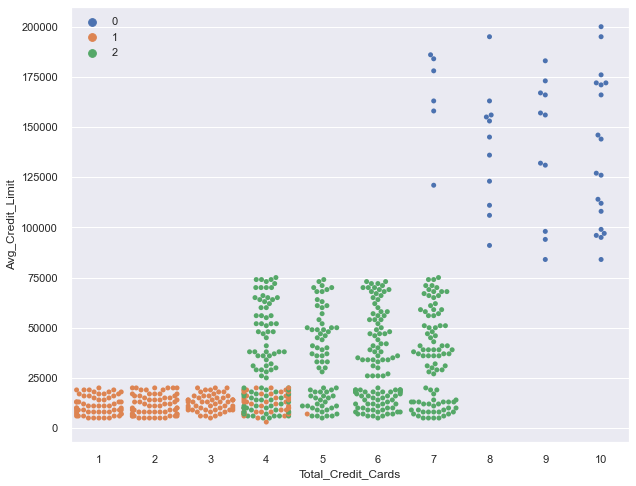

In [89]:
# Total_Credit_Cards vs. Avg_Credit_Limit (Total_visits_bank)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit',hue='Hiearchical_labels')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:])

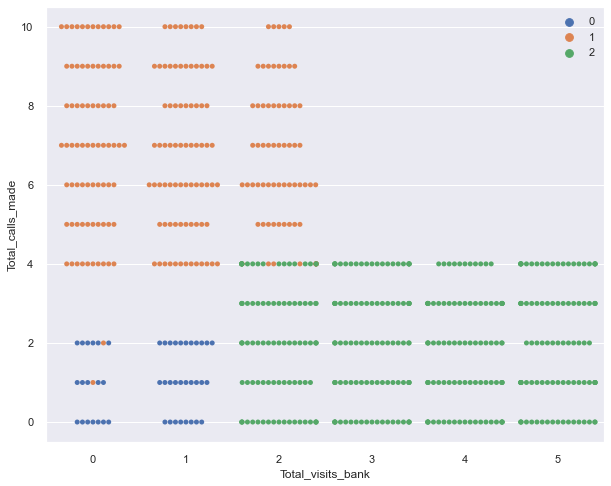

In [90]:
# Total_visits_bank vs. Total_calls_made (K_means_labels)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_visits_bank', y='Total_calls_made',hue='Hiearchical_labels')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:])
#ax.set_xlim([0, 40])

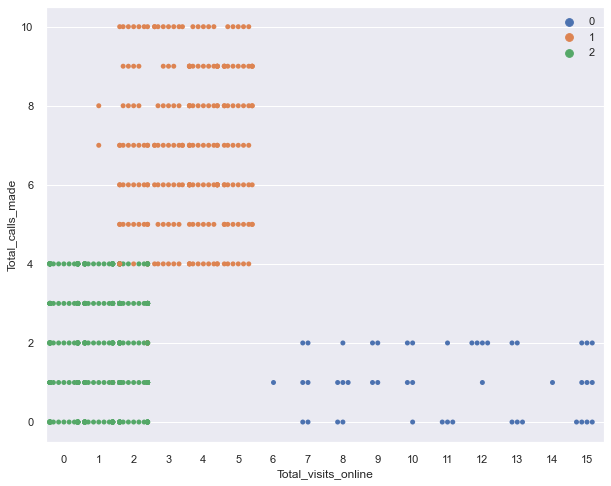

In [92]:
# Total_visits_online vs. Total_calls_made (K_means_labels)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot(ax=ax,data=df, x='Total_visits_online', y='Total_calls_made',hue='Hiearchical_labels')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:])
#ax.set_xlim([0, 40])

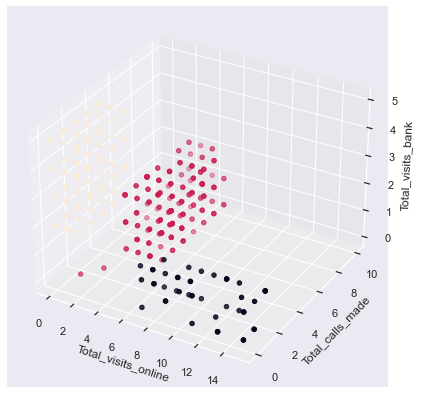

In [98]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Total_visits_online']
y = df['Total_calls_made']
z = df['Total_visits_bank']
h = df['Hiearchical_labels']

ax.set_xlabel("Total_visits_online")
ax.set_ylabel("Total_calls_made")
ax.set_zlabel("Total_visits_bank")

ax.scatter(x, y, z, c=h)

plt.show()

#### Summary

- Clearly some of the insights discovered during EDA are coming to light here after modeling the data with both K means and Hiearchical methods (with K means taking the slight edge - notice the grouping for 5 credit cards and under 25k credit limit)
- The 3 groups are as follows:
 ##### Group A - Lower Tier Customers
  1. Credit Limit < 25k dollars
  2. Total Credit cards < 5
  3. Total visits to bank between 0 and 2
  4. Total visits online between 2 and 5
  5. Total calls made between 4 and 10
 
 ##### Group B - Middle Tier Customers
  1. Credit Limit between 0 and 75k dollars
  2. Total Credit cards betwen 4 and 7
  3. Total visits to bank between 2 and 5
  4. Total visits online between 0 and 2
  5. Total calls made between 0 and 4
 
 ##### Group C - High Tier Customers
  1. Credit Limit > 75k dollars
  2. Total Credit cards > 6
  3. Total visits to bank between 0 and 1
  4. Total visits online between 6 and 15
  5. Total calls made between 0 and 2
  

## Business Conclusions and Recommendations (7 marks)

- No recommendations can be made based on the current dataset we do not have info related to:
 - How much they spend during a given time frame
 - What was the length (in time) spent trying to resolve the inquiry
 - Whether the inquiry was resolved (or not)
 - How satisfied they are with their service
- The only insights we have are how to group the customers based on the 5 data points
 - Avg Credit Limit
 - Total Credit Cards
 - Number of visits to bank/online storefront
 - Number of calls to support center

- Lower Tier Customers (Group A) have the most amount of calls, but similar number of overall contacts as compared to Group C
- Middle Tier Customers (Group B) have the fewest overall contacts, but has a larger number of visits to the physical bank (this could take a lot of time)
- Higher Tier Customers (Group C) have the most amount of online visits, but has the most overall contacts - this could be ok if online visits can resolve issues more quickly than calls or in-person visits